In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA # For visualization in reduced dimensions

In [3]:
# Load the dataset
file_path = '/home/roshan/Documents/code/ISRO/Dataset.csv' # Replace with your CSV file path
data = pd.read_csv(file_path)

# Select features for K-Means clustering
features_for_kmeans = [
    'Daily Mean PM2.5 Concentration',
    'Daily AQI Value',
    'Daily Obs Count',
    'Percent Complete',
    'Site Latitude',
    'Site Longitude'
]

X = data[features_for_kmeans].copy()

# Handle missing values (filling with mean)
X = X.fillna(X.mean())

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<Figure size 1200x1000 with 0 Axes>

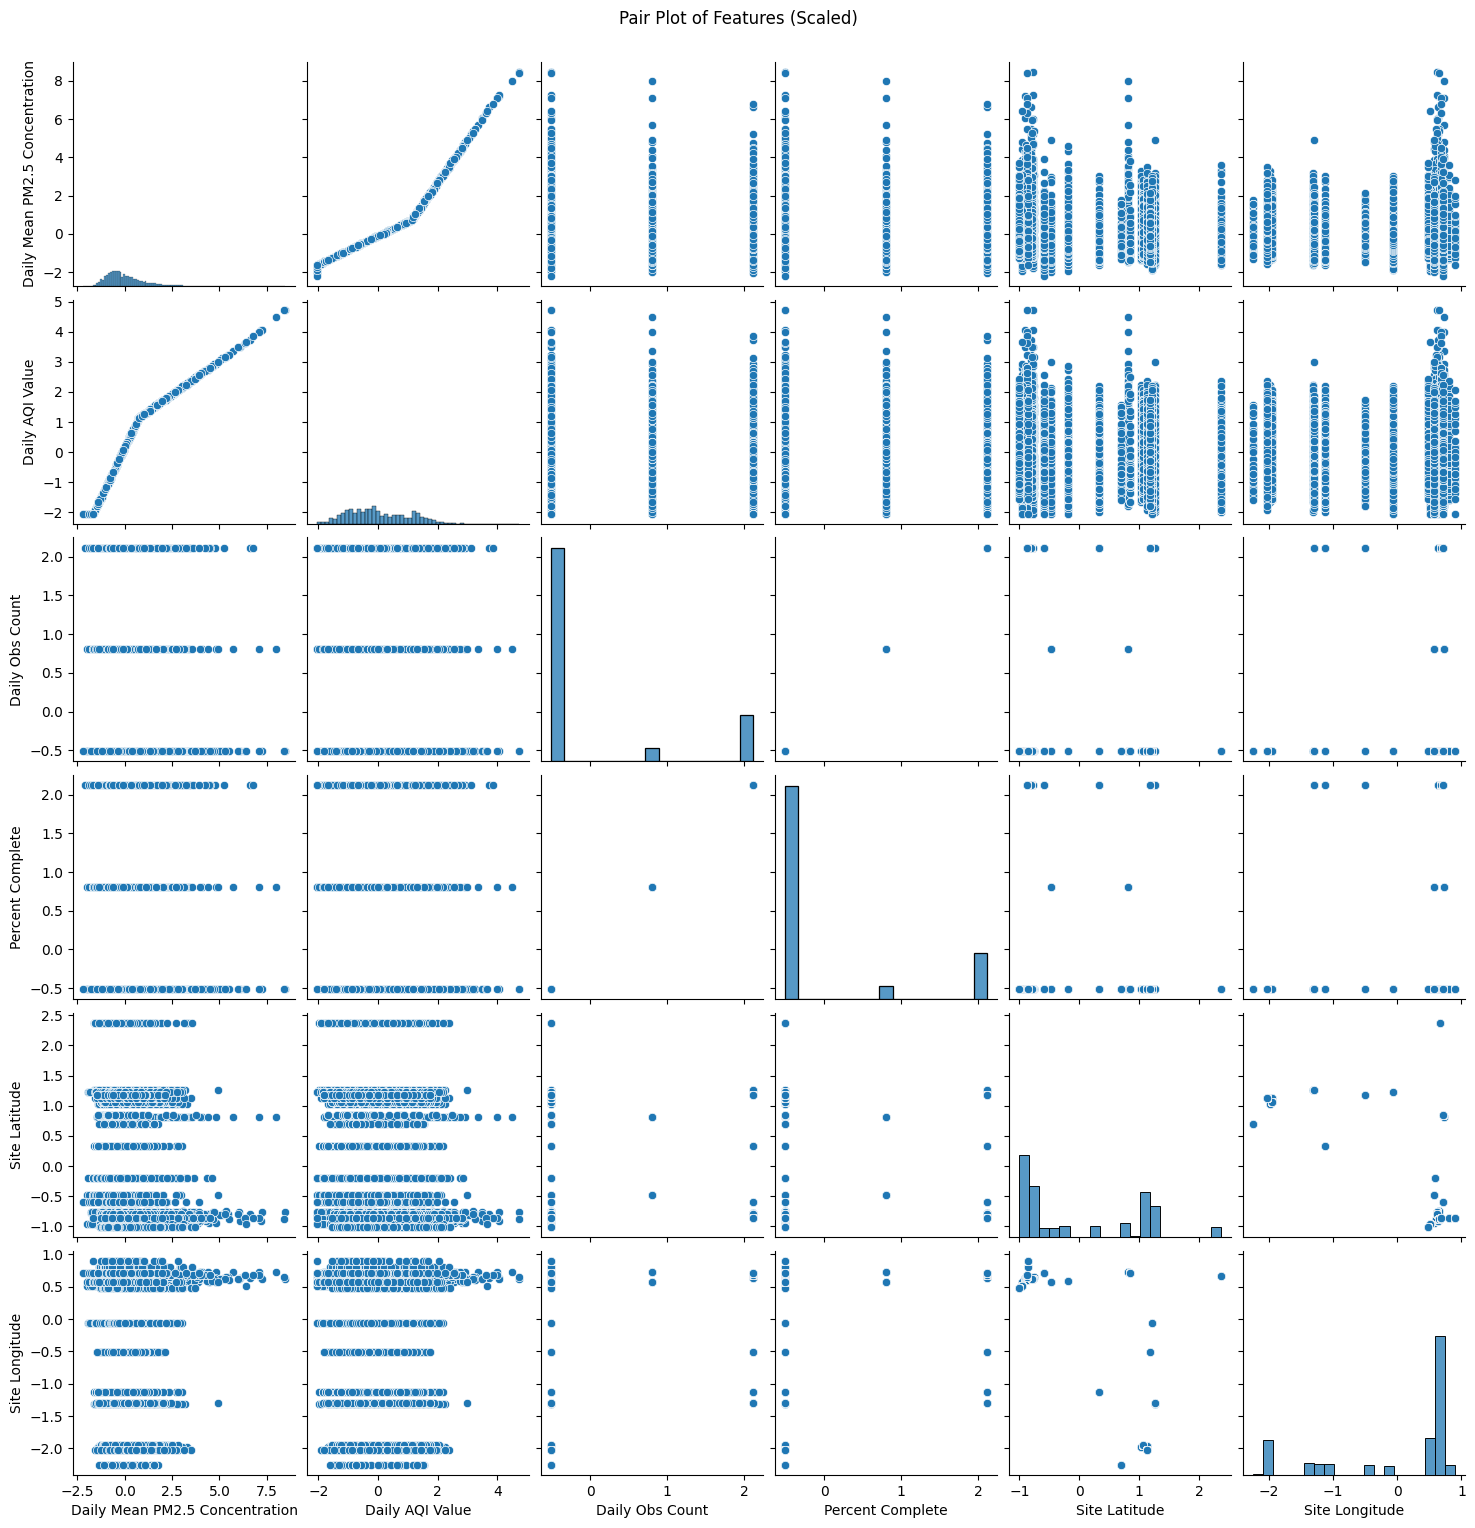

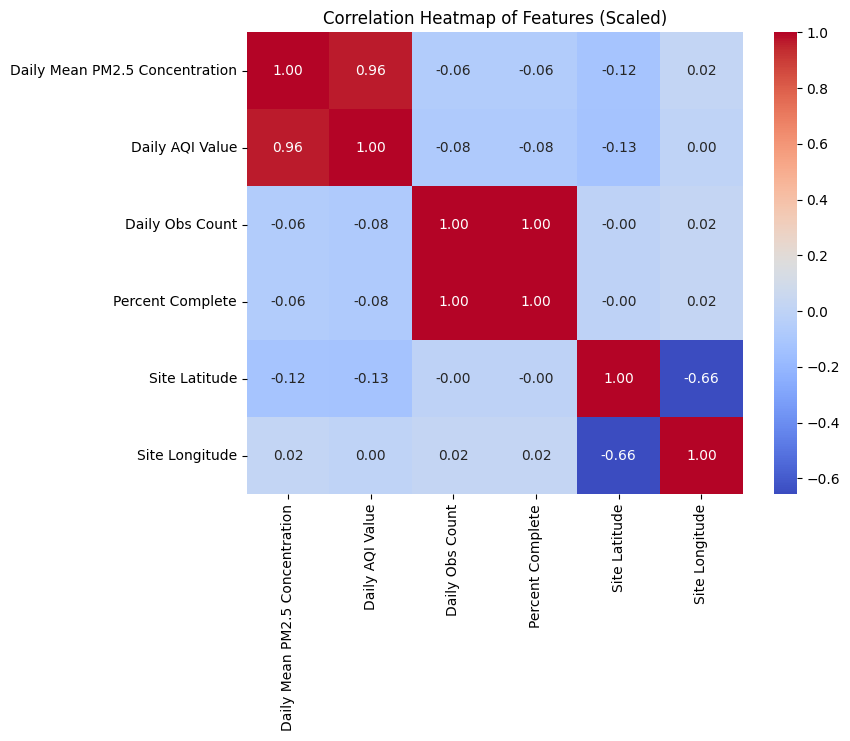

In [4]:
# Convert scaled data to DataFrame for easier visualization
X_scaled_df = pd.DataFrame(X_scaled, columns=features_for_kmeans)

# Pair Plot
plt.figure(figsize=(12, 10))
sns.pairplot(X_scaled_df)
plt.suptitle('Pair Plot of Features (Scaled)', y=1.02)
plt.show()

# Correlation Heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = X_scaled_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features (Scaled)')
plt.show()

In [5]:
# Apply K-Means Clustering
n_clusters = 3 # Choose the number of clusters (e.g., 3, can be determined using methods like elbow method, silhouette score, or domain knowledge)
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters_kmeans = kmeans.fit_predict(X_scaled)

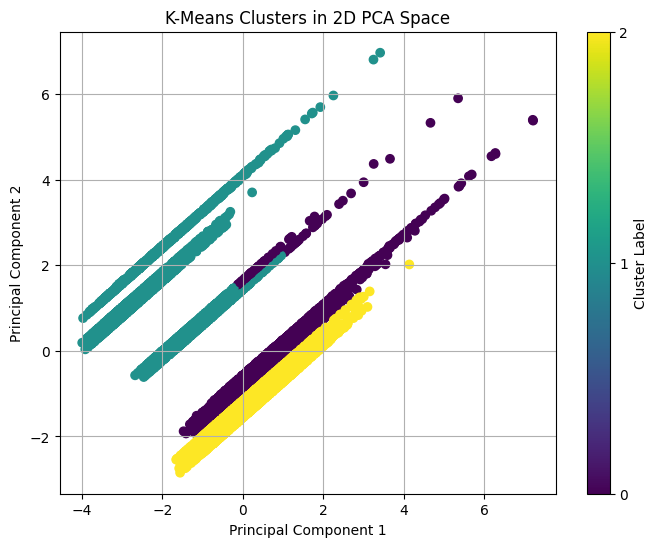

In [6]:
# Apply PCA for dimensionality reduction to visualize clusters
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize K-Means clusters in 2D PCA space
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_kmeans, cmap='viridis', marker='o') # Color points by K-Means cluster labels
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clusters in 2D PCA Space')
plt.colorbar(scatter, label='Cluster Label', ticks=range(n_clusters))
plt.grid(True)
plt.show()

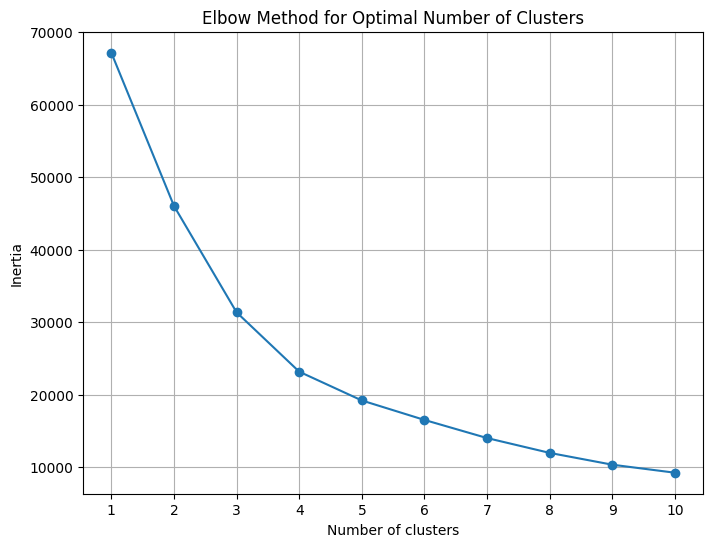

In [7]:
# Elbow Method for optimal number of clusters
inertia = []
range_clusters = range(1, 11) # Trying number of clusters from 1 to 10

for i in range_clusters:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range_clusters, inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(range_clusters)
plt.grid(True)
plt.show()